In [2]:
import json
import glob

import numpy as np
import seaborn as sns
sns.set(font_scale=2, style='white')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, average_precision_score

from covid.models import *

## f1 scores for each model configuration

In [6]:
models = ['Simple Model', 'Tiny Model', 'Small Model', 'LargeW Model', 'LargeT Model', 'ResNet-50', 'EfficientNet B3 - pretrained on ImageNet', 'EfficientNet B3']

f1 scores achieved on the validation set:

In [3]:
f1_simple = [0.778, 0.644, 0.767, 0.810, 0.698, 0.679, 0.621, 0.628, 0.662, 0.635, 0.586, 0.632, 0.660, 0.609, 0.638, 0.518, 0.725, 0.605, 0.670, 0.682]
f1_tiny = [0.861, 0.822, 0.754, 0.706, 0.681, 0.672, 0.665, 0.687, 0.719, 0.703, 0.556, 0.546, 0.743, 0.800, 0.723, 0.693, 0.638, 0.763, 0.578, 0.567]
f1_small = [0.860, 0.847, 0.729, 0.785, 0.747, 0.710, 0.609, 0.637, 0.779, 0.716, 0.707, 0.706, 0.775, 0.828, 0.696, 0.707, 0.748, 0.751, 0.592, 0.554]
f1_largew = [0.840, 0.853, 0.682, 0.754, 0.771, 0.651, 0.692, 0.623, 0.725, 0.674, 0.623, 0.600, 0.829, 0.800, 0.537, 0.207, 0.756, 0.648, 0.639, 0.577]
f1_larget = [0.888, 0.865, 0.749, 0.695, 0.667, 0.700, 0.672, 0.628, 0.693, 0.729, 0.714, 0.634, 0.739, 0.754, 0.764, 0.724, 0.788, 0.707, 0.631, 0.582]
f1_bit = [0.766, 0.738, 0.652, 0.606, 0.742, 0.741, 0.602, 0.570, 0.745, 0.744, 0.748, 0.758, 0.736, 0.718, 0.581, 0.572, 0.727, 0.741, 0.742, 0.743]
f1_enet_imagenet = [0.698, 0.654, 0.560, 0.466, 0.687, 0.649, 0.536, 0.563, 0.754, 0.706, 0.591, 0.578, 0.733, 0.721, 0.591, 0.574, 0.768, 0.744, 0.636, 0.632]
f1_enet = [0.588, 0.681, 0.708, 0.671, 0.680, 0.365, 0.585, 0.572, 0.667, 0.654, 0.634, 0.472, 0.761, 0.753, 0.731, 0.323, 0.628, 0.674, 0.679, 0.614]

f1 = [f1_simple, f1_tiny, f1_small, f1_largew, f1_larget, f1_bit, f1_enet_imagenet, f1_enet]

In [4]:
def plot_f1_scores(f1):
    for i in range(len(f1)):
        plt.figure(figsize=(11,7))
        
        for j in range(0, len(f1[i]), 4):
            ax1 = plt.bar(j-1.05, f1[i][j], width=0.7, linewidth=0, label='baseline', color=sns.color_palette('deep')[0])
            ax2 = plt.bar(j-0.35, f1[i][j+1], width=0.7, linewidth=0, label='class weight', color=sns.color_palette('deep')[2])
            ax3 = plt.bar(j+0.35, f1[i][j+2], width=0.7, linewidth=0, label='data augmentation', color=sns.color_palette('Set2')[6])
            ax4 = plt.bar(j+1.05, f1[i][j+3], width=0.7, linewidth=0, label='class weight + data augmentation', color=sns.color_palette('deep')[4])
            
        plt.plot([-2.5, 18.5], [0.65, 0.65], '--k')
    
        plt.ylabel('f1_score')
        plt.yticks(np.arange(0,1.1,step=0.1))
        plt.xticks(range(0,20,4), ['original', 'nobackg', 'crop', 'lungs-nocrop', 'lungs'])
        plt.legend([ax1, ax2, ax3, ax4], ['baseline', 'classw', 'dataaug', 'classw-dataaug'], bbox_to_anchor=(1,0.5), loc='center left')
        plt.ylim(0,1)
        plt.xlim(-2.5,18.5)
        plt.title(models[i]);

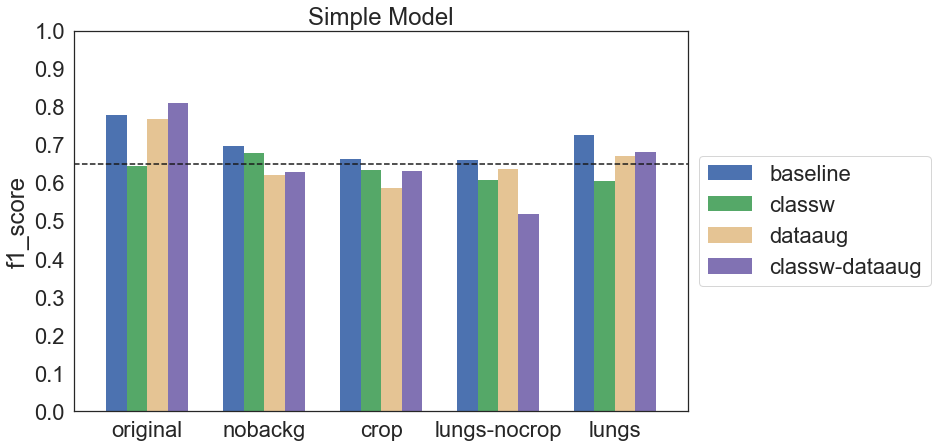

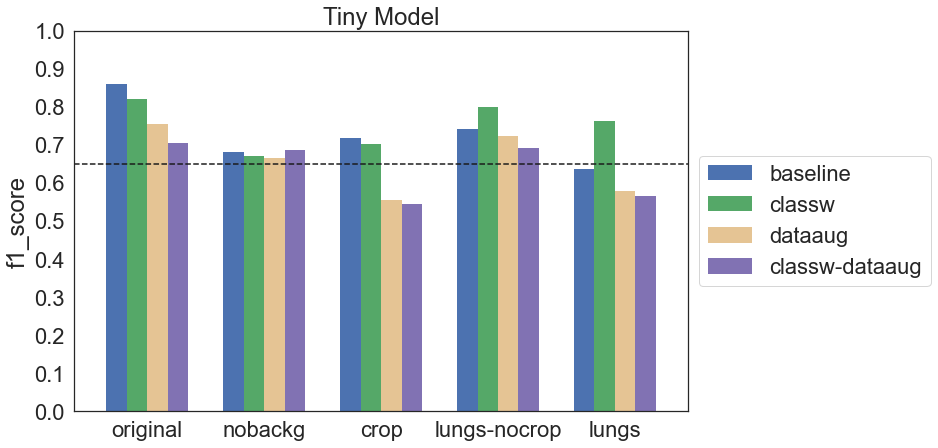

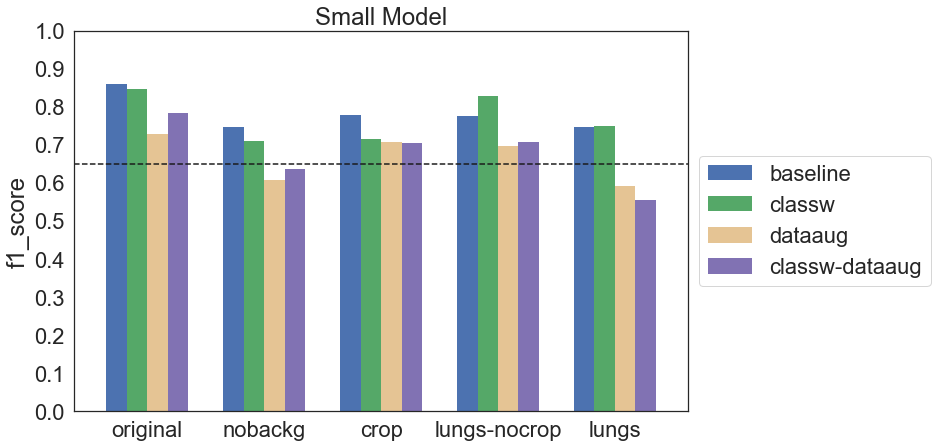

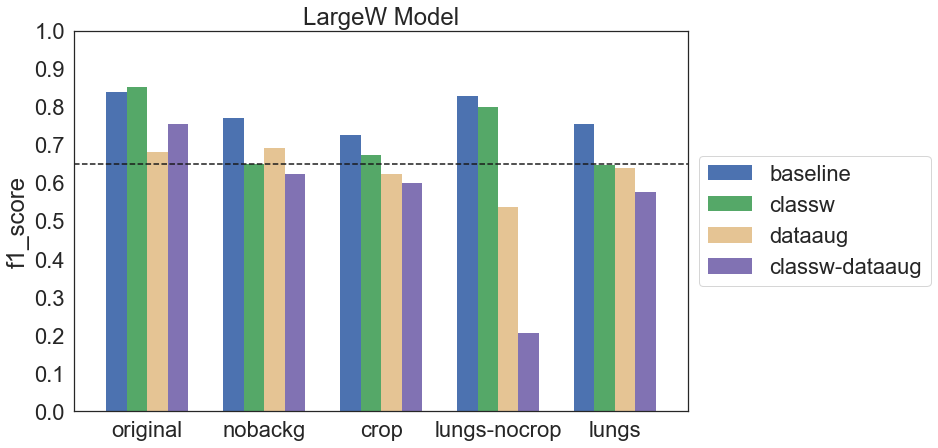

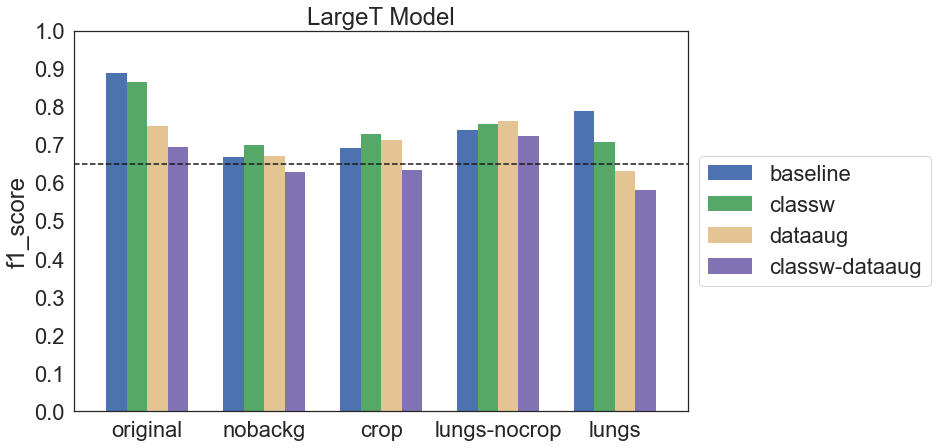

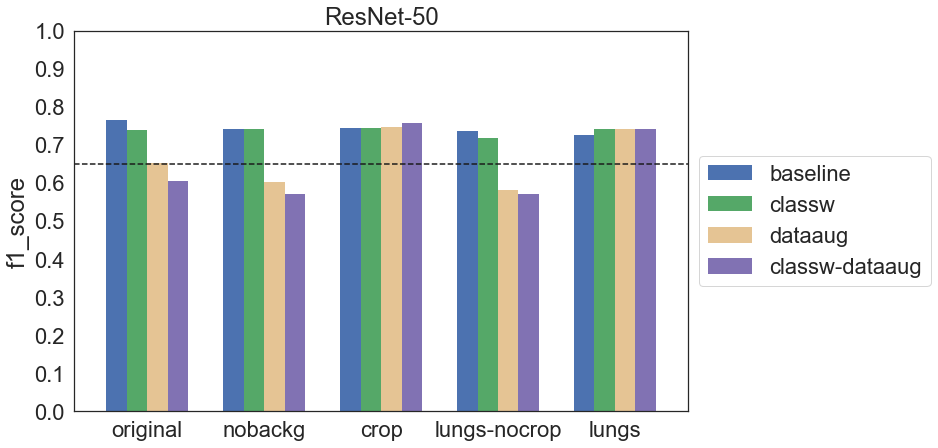

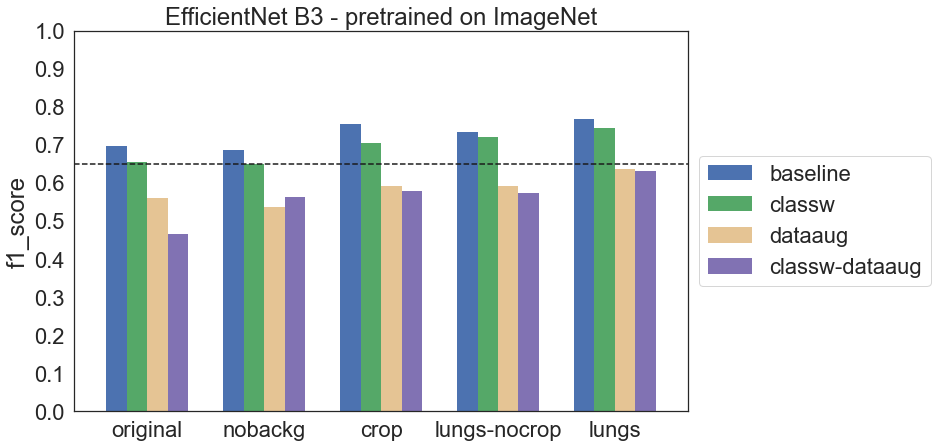

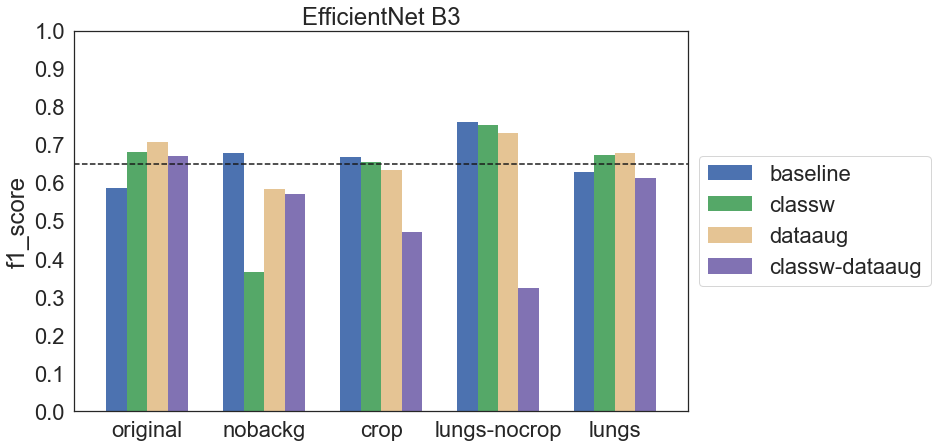

In [7]:
plot_f1_scores(f1)

## EfficientNets - comparison

f1 scores achived by EfficientNet models on the validation set with original images:

In [1]:
f1_b0 = [0.720, 0.686]
f1_b3 = [0.698, 0.588]
f1_b7 = [0.761, 0.673]

In [2]:
def f1_efficientnets(f1_b0, f1_b3, f1_b7):
    plt.figure(figsize=(11,7))
    
    b0 = plt.bar(-0.15, f1_b0[0], width=0.15, linewidth=0, label='b0', color=sns.color_palette('deep')[0])
    b3 = plt.bar(0, f1_b3[0], width=0.15, linewidth=0, label='b3', color=sns.color_palette('deep')[2])
    b7 = plt.bar(0.15, f1_b7[0], width=0.15, linewidth=0, label='b7', color=sns.color_palette('Set2')[6])
    
    plt.bar(0.85, f1_b0[1], width=0.15, linewidth=0, label='b0', color=sns.color_palette('deep')[0])
    plt.bar(1, f1_b3[1], width=0.15, linewidth=0, label='b3', color=sns.color_palette('deep')[2])
    plt.bar(1.15, f1_b7[1], width=0.15, linewidth=0, label='b7', color=sns.color_palette('Set2')[6])
    
    plt.plot([-0.3, 1.3], [0.65, 0.65], '--k')
    
    plt.ylabel('f1_score')
    plt.yticks(np.arange(0,1.1,step=0.1))
    plt.xticks(range(0,2), ['ImageNet', 'None'])
    plt.legend([b0, b3, b7], ['B0', 'B3', 'B7'], bbox_to_anchor=(1,0.5), loc='center left')
    plt.ylim(0,1)
    plt.xlim(-0.3, 1.3)
    plt.title('EfficientNets');

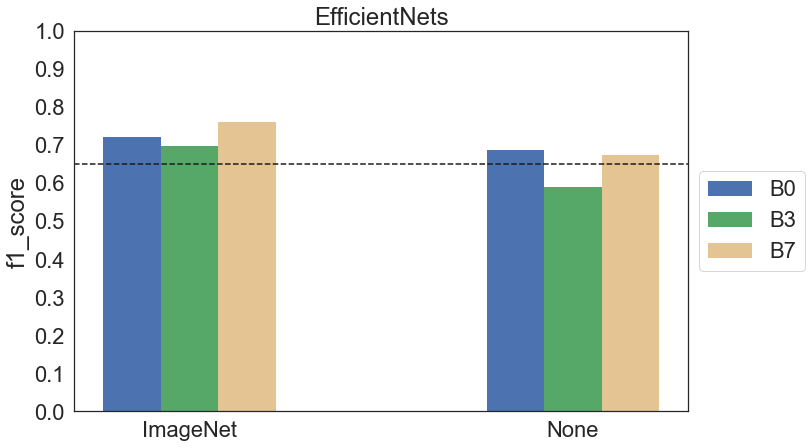

In [6]:
f1_efficientnets(f1_b0, f1_b3, f1_b7)